# Transformada de Laplace aplicada al análisis de sistemas lineales.

Como se trató en secciones anteriores, la integral de convolución {eq}`convolucion` permite encontrar la respuesta de los sistemas lineales e invariantes en el tiempo a partir del conocimiento de su respuesta al impulso. La transformada de Laplace permite convertir un problema de cálculo en uno de álgebra, entonces, la transformada de laplace al ser aplicada a la integral de convolución convierte esta operación en un producto tal que

```{math}
:label: conv_Laplace
 \mathscr{L} \left\{ y(t) \right\}= Y(s)=\mathscr{L} \left\{ x(t)*h(t) \right\}=\mathscr{L} \left\{ \int^{\infty}_{-\infty}x(\tau)h(t-\tau)d\tau \right\}=X(s)H(s)
```

Como era de esperarse, el operador transformada convierte a la integral de convolución en un producto simple de transformadas. Este concepto es ampliamente utilizado en teoría de control de sistemas lineales por que permite el uso de las herramientas del álgebra en el modelado de sistemas dinámicos. Es claro que la señal de salida $y(t)$ es la transformada inversa de $Y(s)$, es decir:

$$
y(t)= \mathscr{L}^{-1} \left\{ Y(s) \right\}
$$

Es importante mencionar que la respuesta al impulso de un sistema lineal invariante en el tiempo se puede obtener fácilmente aplicando la transformada de Laplace, dado que según se reporta en la {numref}`Tabla_transformadas` la transformada de Laplace del impulso unitario es igual a uno. Esta propiedad permite encontrar la respuesta a la entrada tipo impulso de un sistema de forma directa, en vez de calcular primero la respuesta al escalón y derivando como se establece en la ecuación {eq}`deriv_impulso`.

```{admonition} Determinación de la respuesta de un sistema lineal e invariante en el tiempo
Para encontrar la respuesta de un sistema lineal usando la trasformada de Laplace se sigue el siguiente procedimiento:
 
 1. Encuentre la respuesta al impulso del sistema usando como estímulo la función $\delta(t)$, tal como se define el la ecuación {eq}`impulso`. 
 
 2.- Encuentre la transformada de Laplace del estímulo o entrada $x(t)$.

 3.- Determine la salida $y(t)$ obteniendo la transformada inversa del producto $X(s)H(s)$.

Este procedimiento es válido debido a la propiedad de la transformada de Laplace definida en la ecuación {eq}`conv_Laplace`.

```
Por ejemplo, la respuesta al impulso del circuito RLC, aplicando la trasformada de Laplace se obtiene al pantear la ecuación diferencial

$$
\begin{equation}
  LC\frac{d^2v_c(t)}{dt^2}+RC\frac{dv_c(t)}{dt}+v_c(t)=\delta(t)
	\end{equation}
$$

Aplicando la transformada de Laplace se obtiene la expresión algebraica:


$$
  \mathscr{L} \left\{ LC\frac{d^2v_c(t)}{dt^2}+RC\frac{dv_c(t)}{dt}+v_c(t) \right\}=  \mathscr{L} \left\{ \delta(t) \right\}
$$

Dado que se consideran condiciones iniciales nulas se obtiene:

$$
[LCs^2+RCs+1]V_c(s) =  1
$$

Despejando $V_c(s)$:


$$
V_c(s)=\frac{1}{LCs^2+RCs+1}
$$

Nótese que en este caso $V_c(s)=H(s)$Si se aplican los valores numéricos para los parámetros $R$, $L$ y $C$, los reportados en la {numref}`Tabla_paramRLC` se obtiene:

$$
H(s)=\frac{1}{1.661\times 10^{-5}s^2+0.0018s+1}
$$

Entonces, para encontrar la respuesta del sistema ante cualquier otra señal de estímulo se usa la propiedad del producto y la transformada inversa de Laplace. Por ejemplo, para encontrar la respuesta del circuiro RLC mostrado en la {numref}`RLC` cuando $v_s=3.4e^{-4.5t}$ se usa la expresión:

$$
v_c(t)=\mathscr{L}^{-1} \left\{ V_c(s) \right\}
$$

donde:

$$
V_c(s)=H(s)V_s(s)=\left ( \frac{1}{1.661\times 10^{-5}s^2+0.0018s+1}\right )\left ( \frac{3.4}{s+4.5}\right )=\frac{3.4}{(s+4.5)(1.661\times 10^{-5}s^2+0.0018s+1)}
$$

La tansformada inversa se puede obtener haciedo uso del comando `residue()` como en la práctica anterior:


In [1]:
clear
close all
clc

num=[3.4];
den=conv([1 4.5],[1.661e-5 0.0018 1]); % el comando conv() tambien permite multiplicar polinomios

[r,p,k] = residue(num,den)

r = 
  -1.7133 + 0.3557i
  -1.7133 - 0.3557i
   3.4266 + 0.0000i

p = 
   1.0e+02 *

  -0.5418 + 2.3931i
  -0.5418 - 2.3931i
  -0.0450 + 0.0000i


k =

     []



El resultado anterior se interpreta como la descomposición en fracciones parciales siguiente:

$$
V_c(s)=\frac{3.4266}{s+4.5}+\frac{-1.7133+0.3557j}{s+54.18 + 239.31j}+\frac{-1.7133-0.3557j}{s+54.18 - 239.31j}
$$

con $j=\sqrt{-1}$. La salida $v_c(t)$ es la transformada inversa de Laplace de esta última expresión, de manera que se puede aplicar directamente, de acuerdo con la {numref}`Tabla_transformadas` $ \mathscr{L}^{-1} \left\{ \frac{3.4266}{s+4.5} \right\}=3.4266e^{-4.5t}$ y al resto de la expresión se le aplica la equivalencia expresada en la ecuación {eq}`residuos_general` para obtener:

$$
v_c(t)=3.4266e^{-4.5t}+e^{-54.18t}\left ( -3.4266cos(239.31t)- 0.7114sen(239.31t)\right )
$$

es posible comparar este resultado con el que se obtiene utilizando la convolución numérica, es decir usando el comando `conv()` de MATLAB como se hizo en prácticas anteriroes.


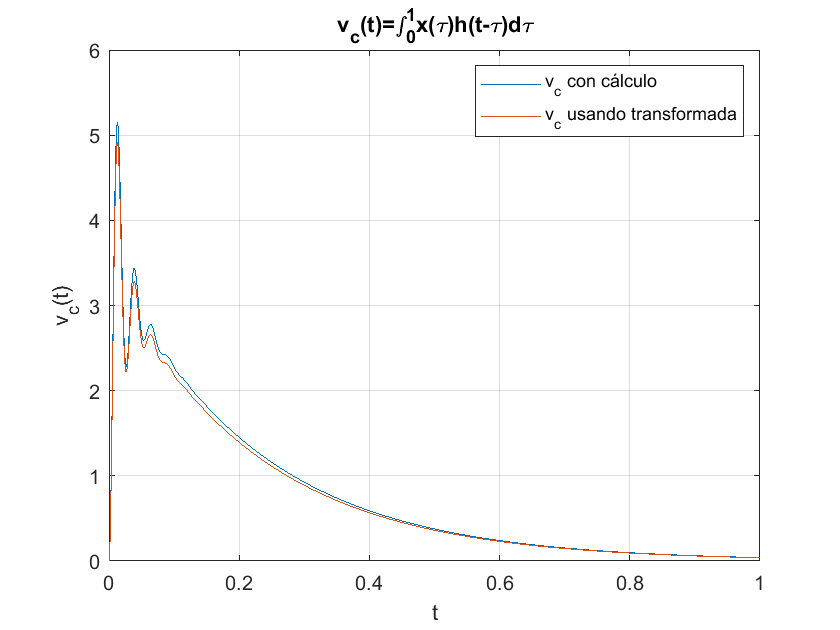

In [26]:
clear 
close all
clc

dt=0.0001;
t=[0:dt:1];

ht= @(x) (x>=0).*(261.7287*sin(239.58*x)).*exp(-52.98*x);
xt= @(x) 3.4*exp(-4.5*x);
vc= @(x) 3.4266.*exp(-4.5*x)+exp(-54.18*x).*( -3.4266*cos(239.31*x)-0.7114*sin(239.31*x));


y=dt*conv(xt(t),ht(t));
ty=dt*(1:length(y))+2*min(t);
figure
plot(ty,y)
hold on
plot(t,vc(t))
xlabel("t")
ylabel("v_c(t)")
title("v_c(t)=\int^{1}_{0}x(\tau)h(t-\tau)d\tau")
set(gca,'fontsize',10);
xlim([0 max(t)])
legend("v_c con cálculo","v_c usando transformada")
grid

